In [1]:
SensorNum=4 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccZ is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
44s - loss: 0.0073 - val_loss: 0.0028
Epoch 2/50
40s - loss: 0.0023 - val_loss: 0.0019
Epoch 3/50
39s - loss: 0.0017 - val_loss: 0.0015
Epoch 4/50
39s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
48s - loss: 0.0011 - val_loss: 9.9727e-04
Epoch 6/50
60s - loss: 9.1527e-04 - val_loss: 8.2289e-04
Epoch 7/50
62s - loss: 7.6330e-04 - val_loss: 6.8025e-04
Epoch 8/50
62s - loss: 6.4997e-04 - val_loss: 5.8845e-04
Epoch 9/50
62s - loss: 5.7145e-04 - val_loss: 5.3080e-04
Epoch 10/50
62s - loss: 5.1820e-04 - val_loss: 5.2573e-04
Epoch 11/50
62s - loss: 4.8410e-04 - val_loss: 4.7546e-04
Epoch 12/50
62s - loss: 4.5278e-04 - val_loss: 4.4298e-04
Epoch 13/50
61s - loss: 4.3038e-04 - val_loss: 4.0862e-04
Epoch 14/50
61s - loss: 4.0978e-04 - val_loss: 4.1839e-04
Epoch 15/50
61s - loss: 3.9349e-04 -

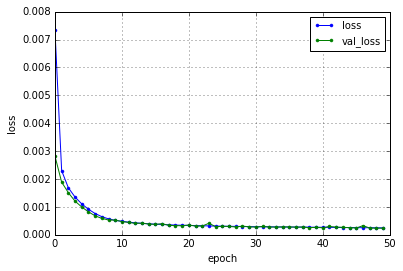

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0055 - val_loss: 0.0015
Epoch 2/50
62s - loss: 0.0012 - val_loss: 9.8192e-04
Epoch 3/50
61s - loss: 8.3163e-04 - val_loss: 7.2096e-04
Epoch 4/50
62s - loss: 6.4990e-04 - val_loss: 6.1462e-04
Epoch 5/50
61s - loss: 5.4278e-04 - val_loss: 4.9401e-04
Epoch 6/50
61s - loss: 4.6524e-04 - val_loss: 4.5381e-04
Epoch 7/50
62s - loss: 4.0787e-04 - val_loss: 3.9004e-04
Epoch 8/50
62s - loss: 3.6405e-04 - val_loss: 3.4184e-04
Epoch 9/50
62s - loss: 3.2871e-04 - val_loss: 3.2544e-04
Epoch 10/50
62s - loss: 3.0207e-04 - val_loss: 2.7497e-04
Epoch 11/50
62s - loss: 2.7758e-04 - val_loss: 2.7133e-04
Epoch 12/50
61s - loss: 2.5975e-04 - val_loss: 2.6685e-04
Epoch 13/50
62s - loss: 2.4353e-04 - val_loss: 2.2583e-04
Epoch 14/50
62s - loss: 2.3117e-04 - val_loss: 2.0833e-04
Epoch 15/50
62s - loss: 2.2007e-04 - val_loss: 2.1503e-04
Epoch 16/50
62s - loss: 2.0922e-04 - val_loss: 1.9665e-04
Epoch 17/50
62s - loss: 2.00

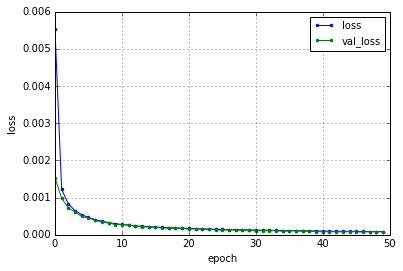

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0044 - val_loss: 9.8050e-04
Epoch 2/50
62s - loss: 7.3618e-04 - val_loss: 5.6910e-04
Epoch 3/50
61s - loss: 4.7783e-04 - val_loss: 4.0607e-04
Epoch 4/50
61s - loss: 3.7341e-04 - val_loss: 3.1837e-04
Epoch 5/50
61s - loss: 3.1428e-04 - val_loss: 2.8893e-04
Epoch 6/50
61s - loss: 2.7212e-04 - val_loss: 2.5350e-04
Epoch 7/50
62s - loss: 2.4217e-04 - val_loss: 2.1425e-04
Epoch 8/50
61s - loss: 2.2220e-04 - val_loss: 2.0736e-04
Epoch 9/50
62s - loss: 2.0377e-04 - val_loss: 1.8266e-04
Epoch 10/50
62s - loss: 1.9407e-04 - val_loss: 3.0753e-04
Epoch 11/50
62s - loss: 1.7956e-04 - val_loss: 1.5677e-04
Epoch 12/50
62s - loss: 1.7071e-04 - val_loss: 1.6339e-04
Epoch 13/50
62s - loss: 1.6132e-04 - val_loss: 1.5495e-04
Epoch 14/50
61s - loss: 1.5460e-04 - val_loss: 1.4069e-04
Epoch 15/50
61s - loss: 1.4756e-04 - val_loss: 1.3245e-04
Epoch 16/50
61s - loss: 1.4295e-04 - val_loss: 1.3095e-04
Epoch 17/50
62s - l

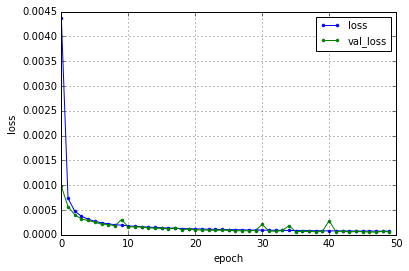

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0035 - val_loss: 7.8430e-04
Epoch 2/50
61s - loss: 5.8430e-04 - val_loss: 5.3192e-04
Epoch 3/50
61s - loss: 3.7336e-04 - val_loss: 3.0221e-04
Epoch 4/50
61s - loss: 2.8850e-04 - val_loss: 3.3448e-04
Epoch 5/50
61s - loss: 2.4024e-04 - val_loss: 2.0933e-04
Epoch 6/50
61s - loss: 2.0614e-04 - val_loss: 1.8118e-04
Epoch 7/50
61s - loss: 1.8416e-04 - val_loss: 1.7117e-04
Epoch 8/50
62s - loss: 1.6582e-04 - val_loss: 1.5796e-04
Epoch 9/50
61s - loss: 1.5418e-04 - val_loss: 1.3125e-04
Epoch 10/50
61s - loss: 1.4378e-04 - val_loss: 1.2740e-04
Epoch 11/50
62s - loss: 1.3451e-04 - val_loss: 1.1519e-04
Epoch 12/50
61s - loss: 1.2572e-04 - val_loss: 1.0637e-04
Epoch 13/50
61s - loss: 1.2103e-04 - val_loss: 1.0467e-04
Epoch 14/50
62s - loss: 1.1559e-04 - val_loss: 1.0029e-04
Epoch 15/50
62s - loss: 1.0926e-04 - val_loss: 1.0093e-04
Epoch 16/50
61s - loss: 1.0548e-04 - val_loss: 9.0335e-05
Epoch 17/50
62s - l

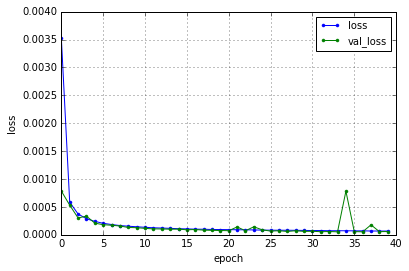

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
64s - loss: 0.0028 - val_loss: 4.3267e-04
Epoch 2/50
65s - loss: 3.4213e-04 - val_loss: 2.5264e-04
Epoch 3/50
64s - loss: 2.3321e-04 - val_loss: 2.0061e-04
Epoch 4/50
64s - loss: 1.8302e-04 - val_loss: 1.5848e-04
Epoch 5/50
65s - loss: 1.5608e-04 - val_loss: 1.4052e-04
Epoch 6/50
65s - loss: 1.3181e-04 - val_loss: 1.0184e-04
Epoch 7/50
65s - loss: 1.1620e-04 - val_loss: 8.8486e-05
Epoch 8/50
65s - loss: 1.0164e-04 - val_loss: 8.3457e-05
Epoch 9/50
65s - loss: 9.2378e-05 - val_loss: 1.3025e-04
Epoch 10/50
64s - loss: 8.5456e-05 - val_loss: 7.0750e-05
Epoch 11/50
65s - loss: 8.1501e-05 - val_loss: 6.3973e-05
Epoch 12/50
65s - loss: 7.6187e-05 - val_loss: 5.8975e-05
Epoch 13/50
65s - loss: 7.3470e-05 - val_loss: 8.0170e-05
Epoch 14/50
64s - loss: 6.8486e-05 - val_loss: 5.3946e-05
Epoch 15/50
63s - loss: 6.6343e-05 - val_loss: 4.7294e-05
Epoch 16/50
64s - loss: 6.5290e-05 - val_loss: 4.8866e-05
Epoch 17/50
65s - l

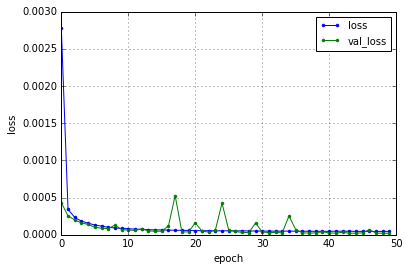

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 0.0010 - val_loss: 1.9023e-04
Epoch 2/50
49s - loss: 1.6439e-04 - val_loss: 1.9313e-04
Epoch 3/50
49s - loss: 1.1410e-04 - val_loss: 8.5958e-05
Epoch 4/50
49s - loss: 8.7674e-05 - val_loss: 1.4947e-04
Epoch 5/50
49s - loss: 6.8854e-05 - val_loss: 4.7881e-05
Epoch 6/50
49s - loss: 5.7218e-05 - val_loss: 4.2344e-05
Epoch 7/50
49s - loss: 5.2438e-05 - val_loss: 3.6005e-05
Epoch 8/50
49s - loss: 4.7440e-05 - val_loss: 3.3832e-05
Epoch 9/50
49s - loss: 4.4582e-05 - val_loss: 3.9498e-05
Epoch 10/50
49s - loss: 4.2677e-05 - val_loss: 3.0444e-05
Epoch 11/50
50s - loss: 4.1615e-05 - val_loss: 2.6540e-05
Epoch 12/50
49s - loss: 3.9758e-05 - val_loss: 3.4537e-05
Epoch 13/50
49s - loss: 3.8527e-05 - val_loss: 2.6379e-04
Epoch 14/50
49s - loss: 3.7914e-05 - val_loss: 2.3844e-05
Epoch 15/50
49s - loss: 3.7204e-05 - val_loss: 2.4306e-05
Epoch 16/50
49s - loss: 3.7283e-05 - val_loss: 2.1694e-05
Epoch 17/50
49s - l

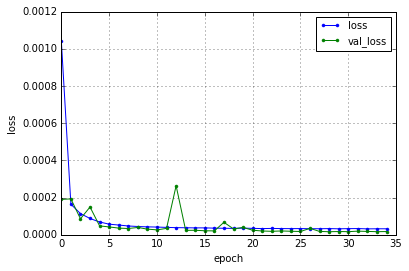

AccZ is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0290 - val_loss: 0.0105
Epoch 2/50
11s - loss: 0.0079 - val_loss: 0.0064
Epoch 3/50
9s - loss: 0.0058 - val_loss: 0.0052
Epoch 4/50
11s - loss: 0.0049 - val_loss: 0.0046
Epoch 5/50
12s - loss: 0.0043 - val_loss: 0.0040
Epoch 6/50
12s - loss: 0.0037 - val_loss: 0.0034
Epoch 7/50
12s - loss: 0.0031 - val_loss: 0.0028
Epoch 8/50
12s - loss: 0.0026 - val_loss: 0.0024
Epoch 9/50
12s - loss: 0.0022 - val_loss: 0.0021
Epoch 10/50
13s - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
12s - loss: 0.0018 - val_loss: 0.0017
Epoch 12/50
12s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
12s - loss: 0.0015 - val_loss: 0.0015
Epoch 14/50
12s - loss: 0.0014 - val_loss: 0.0014
Epoch 15/50
12s - loss: 0.0014 - val_loss: 0.0013
Epoch 16/50
12s - loss: 0.0013 - val_loss: 0.0012
Epoch 17/50
1

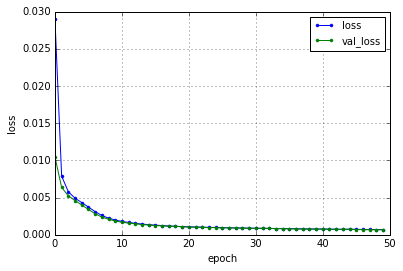

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0206 - val_loss: 0.0066
Epoch 2/50
12s - loss: 0.0049 - val_loss: 0.0037
Epoch 3/50
12s - loss: 0.0030 - val_loss: 0.0024
Epoch 4/50
11s - loss: 0.0020 - val_loss: 0.0017
Epoch 5/50
12s - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
11s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
12s - loss: 0.0011 - val_loss: 0.0010
Epoch 8/50
13s - loss: 9.6933e-04 - val_loss: 8.9117e-04
Epoch 9/50
12s - loss: 8.6616e-04 - val_loss: 8.1554e-04
Epoch 10/50
11s - loss: 7.8681e-04 - val_loss: 7.4245e-04
Epoch 11/50
12s - loss: 7.2948e-04 - val_loss: 7.0061e-04
Epoch 12/50
12s - loss: 6.8437e-04 - val_loss: 6.5474e-04
Epoch 13/50
12s - loss: 6.4849e-04 - val_loss: 6.2947e-04
Epoch 14/50
11s - loss: 6.1710e-04 - val_loss: 5.8310e-04
Epoch 15/50
12s - loss: 5.8958e-04 - val_loss: 5.6240e-04
Epoch 16/50
13s - loss: 5.6335e-04 - val_loss: 5.4102e-04
Epoch 17/50
12s - loss: 5.4180e-04 - val_loss: 5.2048e-04
Epoch 18/50
11

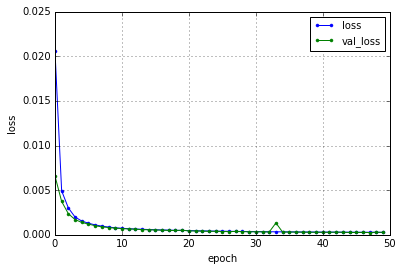

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0211 - val_loss: 0.0046
Epoch 2/50
12s - loss: 0.0033 - val_loss: 0.0022
Epoch 3/50
12s - loss: 0.0018 - val_loss: 0.0016
Epoch 4/50
11s - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
12s - loss: 0.0011 - val_loss: 9.9030e-04
Epoch 6/50
13s - loss: 8.8187e-04 - val_loss: 8.2164e-04
Epoch 7/50
12s - loss: 7.7005e-04 - val_loss: 7.0463e-04
Epoch 8/50
12s - loss: 6.8247e-04 - val_loss: 6.2954e-04
Epoch 9/50
12s - loss: 6.1096e-04 - val_loss: 5.8453e-04
Epoch 10/50
12s - loss: 5.5897e-04 - val_loss: 5.2236e-04
Epoch 11/50
12s - loss: 5.1571e-04 - val_loss: 4.9562e-04
Epoch 12/50
12s - loss: 4.7852e-04 - val_loss: 4.3601e-04
Epoch 13/50
12s - loss: 4.4719e-04 - val_loss: 4.2557e-04
Epoch 14/50
13s - loss: 4.2169e-04 - val_loss: 3.7831e-04
Epoch 15/50
12s - loss: 4.0232e-04 - val_loss: 3.8887e-04
Epoch 16/50
11s - loss: 3.8343e-04 - val_loss: 3.5031e-04
Epoch 17/50
11s - loss: 3.6773e-04 - val_loss: 3.42

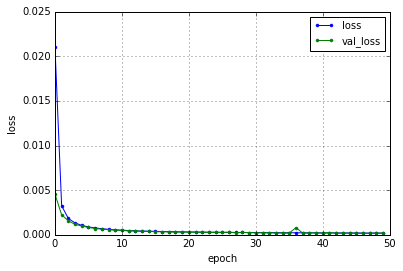

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0132 - val_loss: 0.0030
Epoch 2/50
11s - loss: 0.0020 - val_loss: 0.0014
Epoch 3/50
12s - loss: 0.0012 - val_loss: 9.4806e-04
Epoch 4/50
12s - loss: 8.6739e-04 - val_loss: 7.5123e-04
Epoch 5/50
12s - loss: 7.1110e-04 - val_loss: 6.4528e-04
Epoch 6/50
11s - loss: 6.1443e-04 - val_loss: 5.6204e-04
Epoch 7/50
12s - loss: 5.4942e-04 - val_loss: 5.0424e-04
Epoch 8/50
12s - loss: 4.9260e-04 - val_loss: 4.5730e-04
Epoch 9/50
12s - loss: 4.4955e-04 - val_loss: 4.2553e-04
Epoch 10/50
12s - loss: 4.1207e-04 - val_loss: 3.6737e-04
Epoch 11/50
12s - loss: 3.8208e-04 - val_loss: 3.7430e-04
Epoch 12/50
12s - loss: 3.5537e-04 - val_loss: 3.5091e-04
Epoch 13/50
12s - loss: 3.3645e-04 - val_loss: 2.9967e-04
Epoch 14/50
12s - loss: 3.1626e-04 - val_loss: 2.8460e-04
Epoch 15/50
12s - loss: 3.0295e-04 - val_loss: 2.6409e-04
Epoch 16/50
12s - loss: 2.9227e-04 - val_loss: 2.5815e-04
Epoch 17/50
12s - loss: 2.7917e-04 

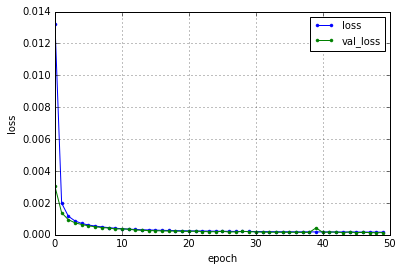

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
13s - loss: 0.0088 - val_loss: 0.0015
Epoch 2/50
12s - loss: 0.0011 - val_loss: 7.9375e-04
Epoch 3/50
12s - loss: 6.7868e-04 - val_loss: 5.4834e-04
Epoch 4/50
11s - loss: 5.1912e-04 - val_loss: 4.4730e-04
Epoch 5/50
12s - loss: 4.3234e-04 - val_loss: 3.9264e-04
Epoch 6/50
12s - loss: 3.7741e-04 - val_loss: 3.2797e-04
Epoch 7/50
12s - loss: 3.4178e-04 - val_loss: 3.4655e-04
Epoch 8/50
12s - loss: 3.1242e-04 - val_loss: 6.7985e-04
Epoch 9/50
12s - loss: 2.8874e-04 - val_loss: 2.5691e-04
Epoch 10/50
12s - loss: 2.7028e-04 - val_loss: 2.3708e-04
Epoch 11/50
12s - loss: 2.5398e-04 - val_loss: 2.3259e-04
Epoch 12/50
12s - loss: 2.4121e-04 - val_loss: 2.0120e-04
Epoch 13/50
12s - loss: 2.3098e-04 - val_loss: 2.0304e-04
Epoch 14/50
12s - loss: 2.2201e-04 - val_loss: 2.0292e-04
Epoch 15/50
11s - loss: 2.1435e-04 - val_loss: 3.6694e-04
Epoch 16/50
12s - loss: 2.0265e-04 - val_loss: 1.6299e-04
Epoch 17/50
12s - loss: 1.9

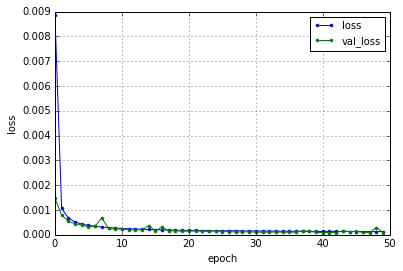

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0043 - val_loss: 7.3782e-04
Epoch 2/50
12s - loss: 5.8785e-04 - val_loss: 4.4708e-04
Epoch 3/50
12s - loss: 3.9973e-04 - val_loss: 3.1180e-04
Epoch 4/50
12s - loss: 3.1137e-04 - val_loss: 0.0011
Epoch 5/50
12s - loss: 2.6175e-04 - val_loss: 2.1329e-04
Epoch 6/50
12s - loss: 2.3284e-04 - val_loss: 2.7078e-04
Epoch 7/50
12s - loss: 2.0812e-04 - val_loss: 2.2633e-04
Epoch 8/50
12s - loss: 1.9004e-04 - val_loss: 1.5365e-04
Epoch 9/50
12s - loss: 1.7634e-04 - val_loss: 1.5176e-04
Epoch 10/50
12s - loss: 1.6647e-04 - val_loss: 1.2958e-04
Epoch 11/50
12s - loss: 1.5868e-04 - val_loss: 1.1678e-04
Epoch 12/50
12s - loss: 1.4728e-04 - val_loss: 1.1151e-04
Epoch 13/50
12s - loss: 1.3972e-04 - val_loss: 1.1976e-04
Epoch 14/50
11s - loss: 1.3510e-04 - val_loss: 1.0077e-04
Epoch 15/50
12s - loss: 1.3150e-04 - val_loss: 1.3030e-04
Epoch 16/50
12s - loss: 1.2830e-04 - val_loss: 8.9476e-05
Epoch 17/50
11s - loss:

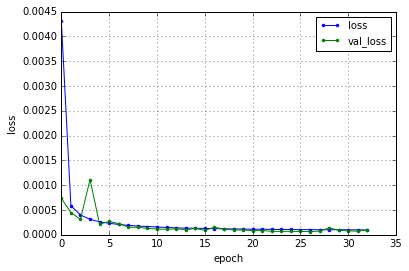

AccZ is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0607 - val_loss: 0.0306
Epoch 2/50
3s - loss: 0.0245 - val_loss: 0.0196
Epoch 3/50
3s - loss: 0.0170 - val_loss: 0.0150
Epoch 4/50
3s - loss: 0.0136 - val_loss: 0.0124
Epoch 5/50
3s - loss: 0.0115 - val_loss: 0.0106
Epoch 6/50
3s - loss: 0.0100 - val_loss: 0.0093
Epoch 7/50
3s - loss: 0.0089 - val_loss: 0.0085
Epoch 8/50
3s - loss: 0.0082 - val_loss: 0.0079
Epoch 9/50
3s - loss: 0.0076 - val_loss: 0.0074
Epoch 10/50
2s - loss: 0.0072 - val_loss: 0.0069
Epoch 11/50
2s - loss: 0.0068 - val_loss: 0.0066
Epoch 12/50
3s - loss: 0.0064 - val_loss: 0.0063
Epoch 13/50
3s - loss: 0.0060 - val_loss: 0.0058
Epoch 14/50
3s - loss: 0.0057 - val_loss: 0.0054
Epoch 15/50
3s - loss: 0.0053 - val_loss: 0.0051
Epoch 16/50
3s - loss: 0.0050 - val_loss: 0.0048
Epoch 17/50
3s - loss: 0.004

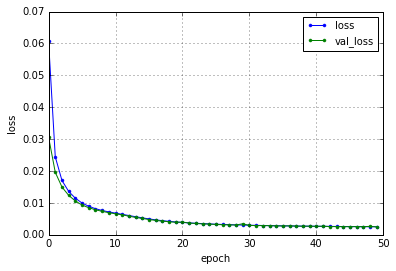

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
2s - loss: 0.0517 - val_loss: 0.0197
Epoch 2/50
2s - loss: 0.0151 - val_loss: 0.0119
Epoch 3/50
2s - loss: 0.0102 - val_loss: 0.0088
Epoch 4/50
2s - loss: 0.0081 - val_loss: 0.0074
Epoch 5/50
3s - loss: 0.0070 - val_loss: 0.0065
Epoch 6/50
3s - loss: 0.0062 - val_loss: 0.0057
Epoch 7/50
2s - loss: 0.0054 - val_loss: 0.0049
Epoch 8/50
2s - loss: 0.0046 - val_loss: 0.0042
Epoch 9/50
3s - loss: 0.0040 - val_loss: 0.0037
Epoch 10/50
2s - loss: 0.0035 - val_loss: 0.0033
Epoch 11/50
3s - loss: 0.0032 - val_loss: 0.0030
Epoch 12/50
3s - loss: 0.0029 - val_loss: 0.0027
Epoch 13/50
3s - loss: 0.0027 - val_loss: 0.0026
Epoch 14/50
3s - loss: 0.0025 - val_loss: 0.0024
Epoch 15/50
3s - loss: 0.0023 - val_loss: 0.0023
Epoch 16/50
3s - loss: 0.0021 - val_loss: 0.0021
Epoch 17/50
3s - loss: 0.0020 - val_loss: 0.0019
Epoch 18/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 19/50
3s - loss: 0.0017 - val_loss: 0.0017
Epoch 20/50
3

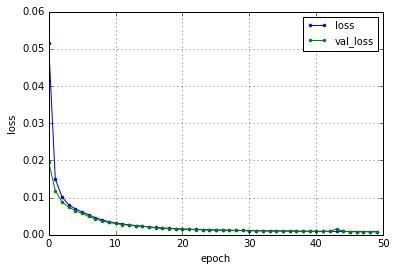

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0413 - val_loss: 0.0163
Epoch 2/50
3s - loss: 0.0113 - val_loss: 0.0081
Epoch 3/50
3s - loss: 0.0066 - val_loss: 0.0054
Epoch 4/50
2s - loss: 0.0046 - val_loss: 0.0040
Epoch 5/50
2s - loss: 0.0037 - val_loss: 0.0033
Epoch 6/50
2s - loss: 0.0031 - val_loss: 0.0029
Epoch 7/50
2s - loss: 0.0027 - val_loss: 0.0025
Epoch 8/50
3s - loss: 0.0024 - val_loss: 0.0022
Epoch 9/50
3s - loss: 0.0022 - val_loss: 0.0020
Epoch 10/50
3s - loss: 0.0020 - val_loss: 0.0022
Epoch 11/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 12/50
3s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
3s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 15/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 16/50
3s - loss: 0.0013 - val_loss: 0.0013
Epoch 17/50
3s - loss: 0.0013 - val_loss: 0.0013
Epoch 18/50
3s - loss: 0.0012 - val_loss: 0.0012
Epoch 19/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 20/50


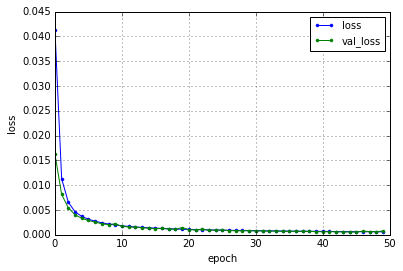

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0391 - val_loss: 0.0116
Epoch 2/50
2s - loss: 0.0083 - val_loss: 0.0061
Epoch 3/50
2s - loss: 0.0051 - val_loss: 0.0042
Epoch 4/50
3s - loss: 0.0036 - val_loss: 0.0031
Epoch 5/50
2s - loss: 0.0029 - val_loss: 0.0026
Epoch 6/50
3s - loss: 0.0024 - val_loss: 0.0033
Epoch 7/50
3s - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
3s - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
3s - loss: 0.0017 - val_loss: 0.0017
Epoch 10/50
3s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
3s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
3s - loss: 0.0012 - val_loss: 0.0013
Epoch 15/50
3s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
3s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
2s - loss: 0.0011 - val_loss: 0.0010
Epoch 18/50
2s - loss: 0.0010 - val_loss: 9.4473e-04
Epoch 19/50
2s - loss: 9.6402e-04 - val_loss: 9.1144e-04


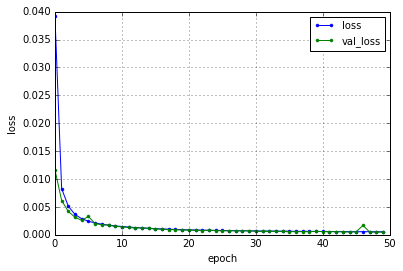

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0261 - val_loss: 0.0068
Epoch 2/50
3s - loss: 0.0046 - val_loss: 0.0032
Epoch 3/50
3s - loss: 0.0026 - val_loss: 0.0021
Epoch 4/50
2s - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
2s - loss: 0.0015 - val_loss: 0.0013
Epoch 6/50
3s - loss: 0.0013 - val_loss: 0.0011
Epoch 7/50
3s - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
3s - loss: 0.0010 - val_loss: 9.0825e-04
Epoch 9/50
3s - loss: 9.2083e-04 - val_loss: 8.5142e-04
Epoch 10/50
3s - loss: 8.5025e-04 - val_loss: 7.8128e-04
Epoch 11/50
3s - loss: 7.9184e-04 - val_loss: 7.1891e-04
Epoch 12/50
3s - loss: 7.3901e-04 - val_loss: 8.1735e-04
Epoch 13/50
3s - loss: 7.1289e-04 - val_loss: 6.3402e-04
Epoch 14/50
3s - loss: 6.7547e-04 - val_loss: 6.4100e-04
Epoch 15/50
2s - loss: 6.3928e-04 - val_loss: 5.9697e-04
Epoch 16/50
2s - loss: 6.1466e-04 - val_loss: 5.6357e-04
Epoch 17/50
3s - loss: 6.0312e-04 - val_loss: 8.3897e-04
Epoch 18/50
3s - loss: 5.7510e-04 

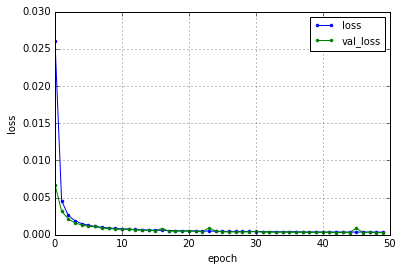

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0201 - val_loss: 0.0034
Epoch 2/50
3s - loss: 0.0024 - val_loss: 0.0017
Epoch 3/50
3s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
3s - loss: 0.0011 - val_loss: 9.1541e-04
Epoch 5/50
2s - loss: 8.8245e-04 - val_loss: 7.5412e-04
Epoch 6/50
3s - loss: 7.5257e-04 - val_loss: 7.1771e-04
Epoch 7/50
3s - loss: 6.8311e-04 - val_loss: 5.9545e-04
Epoch 8/50
3s - loss: 6.1880e-04 - val_loss: 5.5950e-04
Epoch 9/50
3s - loss: 5.7650e-04 - val_loss: 4.9311e-04
Epoch 10/50
3s - loss: 5.3104e-04 - val_loss: 4.8010e-04
Epoch 11/50
3s - loss: 5.0649e-04 - val_loss: 4.6031e-04
Epoch 12/50
3s - loss: 4.7434e-04 - val_loss: 8.1803e-04
Epoch 13/50
2s - loss: 4.6477e-04 - val_loss: 3.8091e-04
Epoch 14/50
3s - loss: 4.3778e-04 - val_loss: 4.3935e-04
Epoch 15/50
3s - loss: 4.1485e-04 - val_loss: 3.3922e-04
Epoch 16/50
3s - loss: 3.9714e-04 - val_loss: 5.9904e-04
Epoch 17/50
3s - loss: 3.9520e-04 - val_loss: 6.4748e-04
Ep

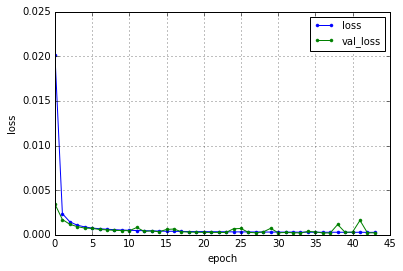

AccZ is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1087 - val_loss: 0.0615
Epoch 2/50
0s - loss: 0.0543 - val_loss: 0.0490
Epoch 3/50
0s - loss: 0.0453 - val_loss: 0.0419
Epoch 4/50
0s - loss: 0.0389 - val_loss: 0.0361
Epoch 5/50
0s - loss: 0.0337 - val_loss: 0.0316
Epoch 6/50
0s - loss: 0.0299 - val_loss: 0.0284
Epoch 7/50
0s - loss: 0.0272 - val_loss: 0.0260
Epoch 8/50
0s - loss: 0.0252 - val_loss: 0.0244
Epoch 9/50
0s - loss: 0.0235 - val_loss: 0.0228
Epoch 10/50
0s - loss: 0.0222 - val_loss: 0.0215
Epoch 11/50
0s - loss: 0.0210 - val_loss: 0.0204
Epoch 12/50
0s - loss: 0.0199 - val_loss: 0.0195
Epoch 13/50
0s - loss: 0.0191 - val_loss: 0.0186
Epoch 14/50
0s - loss: 0.0183 - val_loss: 0.0180
Epoch 15/50
0s - loss: 0.0176 - val_loss: 0.0172
Epoch 16/50
0s - loss: 0.0170 - val_loss: 0.0167
Epoch 17/50
0s - loss: 0.0165 

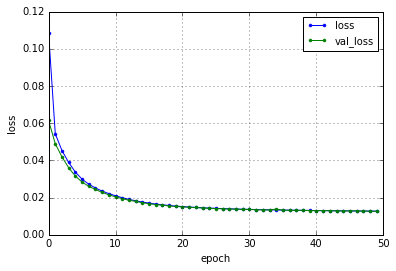

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1024 - val_loss: 0.0568
Epoch 2/50
0s - loss: 0.0483 - val_loss: 0.0416
Epoch 3/50
0s - loss: 0.0367 - val_loss: 0.0323
Epoch 4/50
0s - loss: 0.0292 - val_loss: 0.0263
Epoch 5/50
0s - loss: 0.0243 - val_loss: 0.0223
Epoch 6/50
0s - loss: 0.0209 - val_loss: 0.0193
Epoch 7/50
0s - loss: 0.0182 - val_loss: 0.0171
Epoch 8/50
0s - loss: 0.0162 - val_loss: 0.0153
Epoch 9/50
0s - loss: 0.0146 - val_loss: 0.0139
Epoch 10/50
0s - loss: 0.0133 - val_loss: 0.0128
Epoch 11/50
0s - loss: 0.0124 - val_loss: 0.0119
Epoch 12/50
0s - loss: 0.0116 - val_loss: 0.0112
Epoch 13/50
0s - loss: 0.0109 - val_loss: 0.0106
Epoch 14/50
0s - loss: 0.0104 - val_loss: 0.0100
Epoch 15/50
0s - loss: 0.0099 - val_loss: 0.0096
Epoch 16/50
0s - loss: 0.0095 - val_loss: 0.0093
Epoch 17/50
0s - loss: 0.0091 - val_loss: 0.0089
Epoch 18/50
0s - loss: 0.0087 - val_loss: 0.0086
Epoch 19/50
0s - loss: 0.0084 - val_loss: 0.0082
Epoch 20/50
0s 

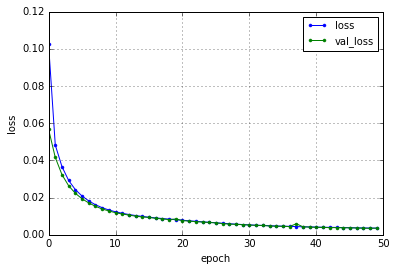

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0867 - val_loss: 0.0468
Epoch 2/50
0s - loss: 0.0392 - val_loss: 0.0327
Epoch 3/50
0s - loss: 0.0285 - val_loss: 0.0249
Epoch 4/50
0s - loss: 0.0222 - val_loss: 0.0198
Epoch 5/50
0s - loss: 0.0180 - val_loss: 0.0163
Epoch 6/50
0s - loss: 0.0151 - val_loss: 0.0139
Epoch 7/50
0s - loss: 0.0130 - val_loss: 0.0121
Epoch 8/50
0s - loss: 0.0114 - val_loss: 0.0107
Epoch 9/50
0s - loss: 0.0102 - val_loss: 0.0097
Epoch 10/50
0s - loss: 0.0093 - val_loss: 0.0088
Epoch 11/50
0s - loss: 0.0085 - val_loss: 0.0086
Epoch 12/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0073 - val_loss: 0.0071
Epoch 14/50
0s - loss: 0.0069 - val_loss: 0.0066
Epoch 15/50
0s - loss: 0.0065 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0061 - val_loss: 0.0059
Epoch 17/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 18/50
0s - loss: 0.0055 - val_loss: 0.0053
Epoch 19/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 20/50
0s

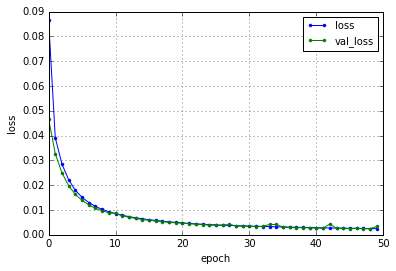

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0948 - val_loss: 0.0470
Epoch 2/50
0s - loss: 0.0386 - val_loss: 0.0315
Epoch 3/50
0s - loss: 0.0267 - val_loss: 0.0225
Epoch 4/50
0s - loss: 0.0196 - val_loss: 0.0169
Epoch 5/50
0s - loss: 0.0151 - val_loss: 0.0134
Epoch 6/50
0s - loss: 0.0123 - val_loss: 0.0112
Epoch 7/50
0s - loss: 0.0104 - val_loss: 0.0098
Epoch 8/50
0s - loss: 0.0090 - val_loss: 0.0084
Epoch 9/50
0s - loss: 0.0080 - val_loss: 0.0075
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0068
Epoch 11/50
0s - loss: 0.0065 - val_loss: 0.0062
Epoch 12/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 13/50
0s - loss: 0.0056 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0055
Epoch 15/50
0s - loss: 0.0049 - val_loss: 0.0047
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0044
Epoch 17/50
0s - loss: 0.0044 - val_loss: 0.0042
Epoch 18/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 19/50
0s - loss: 0.0040 - val_loss: 0.0038
Epoch 20/50
0s

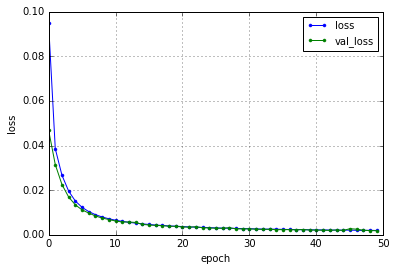

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0737 - val_loss: 0.0338
Epoch 2/50
0s - loss: 0.0238 - val_loss: 0.0167
Epoch 3/50
0s - loss: 0.0136 - val_loss: 0.0111
Epoch 4/50
0s - loss: 0.0098 - val_loss: 0.0085
Epoch 5/50
0s - loss: 0.0077 - val_loss: 0.0069
Epoch 6/50
0s - loss: 0.0064 - val_loss: 0.0060
Epoch 7/50
0s - loss: 0.0056 - val_loss: 0.0051
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 9/50
0s - loss: 0.0044 - val_loss: 0.0042
Epoch 10/50
0s - loss: 0.0040 - val_loss: 0.0038
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0032
Epoch 13/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0028
Epoch 15/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 17/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 18/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 20/50
0s

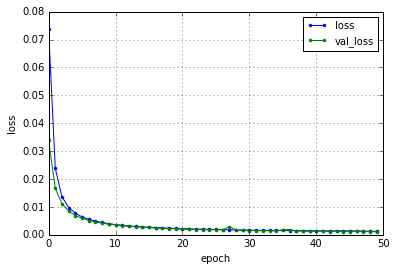

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0601 - val_loss: 0.0229
Epoch 2/50
0s - loss: 0.0150 - val_loss: 0.0100
Epoch 3/50
0s - loss: 0.0080 - val_loss: 0.0063
Epoch 4/50
0s - loss: 0.0055 - val_loss: 0.0047
Epoch 5/50
0s - loss: 0.0044 - val_loss: 0.0039
Epoch 6/50
0s - loss: 0.0036 - val_loss: 0.0033
Epoch 7/50
0s - loss: 0.0031 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0013
Epoch 20/50
0s

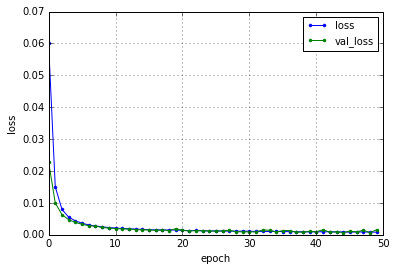

AccZ is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1880 - val_loss: 0.1547
Epoch 2/50
0s - loss: 0.1244 - val_loss: 0.0986
Epoch 3/50
0s - loss: 0.0867 - val_loss: 0.0781
Epoch 4/50
0s - loss: 0.0737 - val_loss: 0.0701
Epoch 5/50
0s - loss: 0.0676 - val_loss: 0.0655
Epoch 6/50
0s - loss: 0.0639 - val_loss: 0.0625
Epoch 7/50
0s - loss: 0.0613 - val_loss: 0.0602
Epoch 8/50
0s - loss: 0.0593 - val_loss: 0.0585
Epoch 9/50
0s - loss: 0.0578 - val_loss: 0.0572
Epoch 10/50
0s - loss: 0.0567 - val_loss: 0.0563
Epoch 11/50
0s - loss: 0.0559 - val_loss: 0.0556
Epoch 12/50
0s - loss: 0.0553 - val_loss: 0.0553
Epoch 13/50
0s - loss: 0.0547 - val_loss: 0.0549
Epoch 14/50
0s - loss: 0.0542 - val_loss: 0.0552
Epoch 15/50
0s - loss: 0.0536 - val_loss: 0.0534
Epoch 16/50
0s - loss: 0.0531 - val_loss: 0.0530
Epoch 17/50
0s - loss: 0.0525 

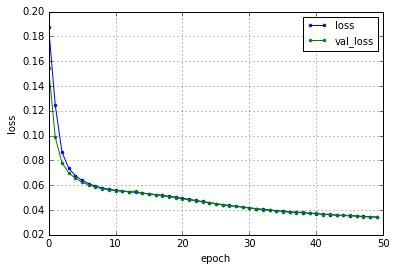

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1661 - val_loss: 0.1101
Epoch 2/50
0s - loss: 0.0848 - val_loss: 0.0713
Epoch 3/50
0s - loss: 0.0672 - val_loss: 0.0640
Epoch 4/50
0s - loss: 0.0620 - val_loss: 0.0601
Epoch 5/50
0s - loss: 0.0588 - val_loss: 0.0576
Epoch 6/50
0s - loss: 0.0565 - val_loss: 0.0555
Epoch 7/50
0s - loss: 0.0547 - val_loss: 0.0538
Epoch 8/50
0s - loss: 0.0532 - val_loss: 0.0524
Epoch 9/50
0s - loss: 0.0517 - val_loss: 0.0509
Epoch 10/50
0s - loss: 0.0503 - val_loss: 0.0495
Epoch 11/50
0s - loss: 0.0488 - val_loss: 0.0486
Epoch 12/50
0s - loss: 0.0472 - val_loss: 0.0468
Epoch 13/50
0s - loss: 0.0456 - val_loss: 0.0449
Epoch 14/50
0s - loss: 0.0440 - val_loss: 0.0433
Epoch 15/50
0s - loss: 0.0423 - val_loss: 0.0420
Epoch 16/50
0s - loss: 0.0407 - val_loss: 0.0398
Epoch 17/50
0s - loss: 0.0391 - val_loss: 0.0397
Epoch 18/50
0s - loss: 0.0376 - val_loss: 0.0370
Epoch 19/50
0s - loss: 0.0362 - val_loss: 0.0354
Epoch 20/50
0s 

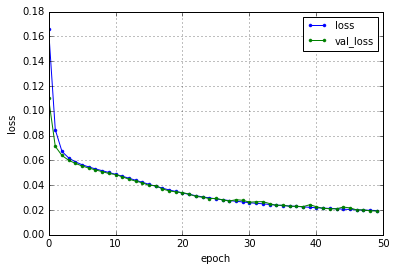

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1527 - val_loss: 0.0912
Epoch 2/50
0s - loss: 0.0761 - val_loss: 0.0680
Epoch 3/50
0s - loss: 0.0647 - val_loss: 0.0618
Epoch 4/50
0s - loss: 0.0598 - val_loss: 0.0580
Epoch 5/50
0s - loss: 0.0566 - val_loss: 0.0553
Epoch 6/50
0s - loss: 0.0541 - val_loss: 0.0530
Epoch 7/50
0s - loss: 0.0520 - val_loss: 0.0509
Epoch 8/50
0s - loss: 0.0499 - val_loss: 0.0489
Epoch 9/50
0s - loss: 0.0478 - val_loss: 0.0473
Epoch 10/50
0s - loss: 0.0458 - val_loss: 0.0454
Epoch 11/50
0s - loss: 0.0437 - val_loss: 0.0426
Epoch 12/50
0s - loss: 0.0417 - val_loss: 0.0412
Epoch 13/50
0s - loss: 0.0397 - val_loss: 0.0392
Epoch 14/50
0s - loss: 0.0378 - val_loss: 0.0368
Epoch 15/50
0s - loss: 0.0359 - val_loss: 0.0356
Epoch 16/50
0s - loss: 0.0342 - val_loss: 0.0335
Epoch 17/50
0s - loss: 0.0325 - val_loss: 0.0317
Epoch 18/50
0s - loss: 0.0312 - val_loss: 0.0304
Epoch 19/50
0s - loss: 0.0299 - val_loss: 0.0296
Epoch 20/50
0s

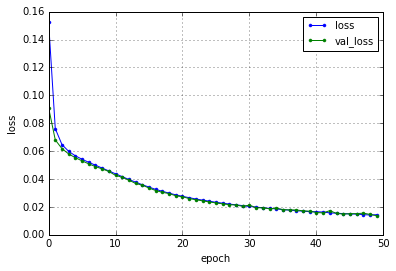

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1512 - val_loss: 0.0886
Epoch 2/50
0s - loss: 0.0723 - val_loss: 0.0640
Epoch 3/50
0s - loss: 0.0610 - val_loss: 0.0584
Epoch 4/50
0s - loss: 0.0566 - val_loss: 0.0549
Epoch 5/50
0s - loss: 0.0536 - val_loss: 0.0523
Epoch 6/50
0s - loss: 0.0510 - val_loss: 0.0497
Epoch 7/50
0s - loss: 0.0485 - val_loss: 0.0475
Epoch 8/50
0s - loss: 0.0459 - val_loss: 0.0448
Epoch 9/50
0s - loss: 0.0433 - val_loss: 0.0419
Epoch 10/50
0s - loss: 0.0407 - val_loss: 0.0403
Epoch 11/50
0s - loss: 0.0381 - val_loss: 0.0373
Epoch 12/50
0s - loss: 0.0358 - val_loss: 0.0346
Epoch 13/50
0s - loss: 0.0337 - val_loss: 0.0326
Epoch 14/50
0s - loss: 0.0319 - val_loss: 0.0309
Epoch 15/50
0s - loss: 0.0302 - val_loss: 0.0293
Epoch 16/50
0s - loss: 0.0287 - val_loss: 0.0283
Epoch 17/50
0s - loss: 0.0274 - val_loss: 0.0267
Epoch 18/50
0s - loss: 0.0262 - val_loss: 0.0255
Epoch 19/50
0s - loss: 0.0252 - val_loss: 0.0246
Epoch 20/50
0s

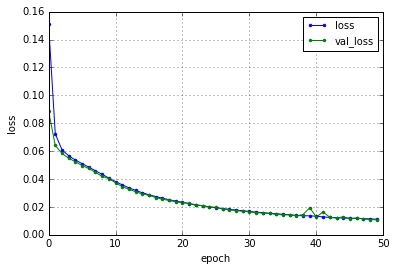

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1257 - val_loss: 0.0677
Epoch 2/50
0s - loss: 0.0609 - val_loss: 0.0566
Epoch 3/50
0s - loss: 0.0536 - val_loss: 0.0504
Epoch 4/50
0s - loss: 0.0479 - val_loss: 0.0451
Epoch 5/50
0s - loss: 0.0427 - val_loss: 0.0401
Epoch 6/50
0s - loss: 0.0379 - val_loss: 0.0356
Epoch 7/50
0s - loss: 0.0338 - val_loss: 0.0319
Epoch 8/50
0s - loss: 0.0304 - val_loss: 0.0288
Epoch 9/50
0s - loss: 0.0276 - val_loss: 0.0267
Epoch 10/50
0s - loss: 0.0254 - val_loss: 0.0244
Epoch 11/50
0s - loss: 0.0235 - val_loss: 0.0226
Epoch 12/50
0s - loss: 0.0219 - val_loss: 0.0211
Epoch 13/50
0s - loss: 0.0204 - val_loss: 0.0203
Epoch 14/50
0s - loss: 0.0192 - val_loss: 0.0185
Epoch 15/50
0s - loss: 0.0181 - val_loss: 0.0174
Epoch 16/50
0s - loss: 0.0169 - val_loss: 0.0171
Epoch 17/50
0s - loss: 0.0161 - val_loss: 0.0162
Epoch 18/50
0s - loss: 0.0152 - val_loss: 0.0149
Epoch 19/50
0s - loss: 0.0144 - val_loss: 0.0139
Epoch 20/50
0s

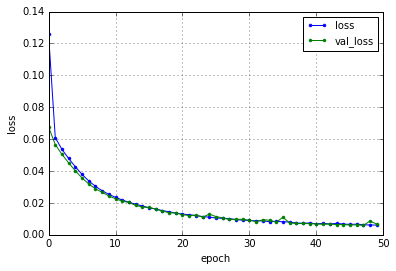

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1180 - val_loss: 0.0619
Epoch 2/50
0s - loss: 0.0558 - val_loss: 0.0501
Epoch 3/50
0s - loss: 0.0455 - val_loss: 0.0407
Epoch 4/50
0s - loss: 0.0367 - val_loss: 0.0327
Epoch 5/50
0s - loss: 0.0297 - val_loss: 0.0270
Epoch 6/50
0s - loss: 0.0245 - val_loss: 0.0224
Epoch 7/50
0s - loss: 0.0208 - val_loss: 0.0193
Epoch 8/50
0s - loss: 0.0180 - val_loss: 0.0168
Epoch 9/50
0s - loss: 0.0159 - val_loss: 0.0149
Epoch 10/50
0s - loss: 0.0142 - val_loss: 0.0134
Epoch 11/50
0s - loss: 0.0128 - val_loss: 0.0122
Epoch 12/50
0s - loss: 0.0117 - val_loss: 0.0111
Epoch 13/50
0s - loss: 0.0108 - val_loss: 0.0103
Epoch 14/50
0s - loss: 0.0099 - val_loss: 0.0095
Epoch 15/50
0s - loss: 0.0093 - val_loss: 0.0092
Epoch 16/50
0s - loss: 0.0087 - val_loss: 0.0086
Epoch 17/50
0s - loss: 0.0081 - val_loss: 0.0080
Epoch 18/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 19/50
0s - loss: 0.0074 - val_loss: 0.0072
Epoch 20/50
0s

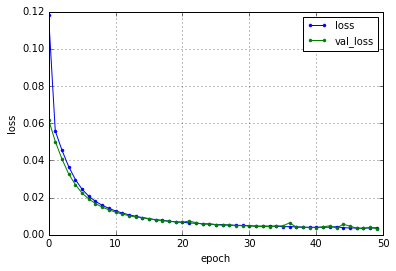

AccZ is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2008 - val_loss: 0.1921
Epoch 2/50
0s - loss: 0.1819 - val_loss: 0.1689
Epoch 3/50
0s - loss: 0.1585 - val_loss: 0.1467
Epoch 4/50
0s - loss: 0.1384 - val_loss: 0.1292
Epoch 5/50
0s - loss: 0.1229 - val_loss: 0.1160
Epoch 6/50
0s - loss: 0.1113 - val_loss: 0.1062
Epoch 7/50
0s - loss: 0.1027 - val_loss: 0.0989
Epoch 8/50
0s - loss: 0.0963 - val_loss: 0.0935
Epoch 9/50
0s - loss: 0.0915 - val_loss: 0.0893
Epoch 10/50
0s - loss: 0.0877 - val_loss: 0.0859
Epoch 11/50
0s - loss: 0.0846 - val_loss: 0.0831
Epoch 12/50
0s - loss: 0.0821 - val_loss: 0.0808
Epoch 13/50
0s - loss: 0.0799 - val_loss: 0.0789
Epoch 14/50
0s - loss: 0.0781 - val_loss: 0.0772
Epoch 15/50
0s - loss: 0.0765 - val_loss: 0.0757
Epoch 16/50
0s - loss: 0.0752 - val_loss: 0.0744
Epoch 17/50
0s - loss: 0.0739 

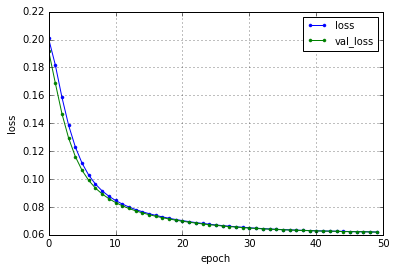

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2070 - val_loss: 0.1960
Epoch 2/50
0s - loss: 0.1865 - val_loss: 0.1735
Epoch 3/50
0s - loss: 0.1609 - val_loss: 0.1453
Epoch 4/50
0s - loss: 0.1331 - val_loss: 0.1197
Epoch 5/50
0s - loss: 0.1112 - val_loss: 0.1023
Epoch 6/50
0s - loss: 0.0970 - val_loss: 0.0917
Epoch 7/50
0s - loss: 0.0885 - val_loss: 0.0852
Epoch 8/50
0s - loss: 0.0831 - val_loss: 0.0809
Epoch 9/50
0s - loss: 0.0795 - val_loss: 0.0779
Epoch 10/50
0s - loss: 0.0768 - val_loss: 0.0755
Epoch 11/50
0s - loss: 0.0747 - val_loss: 0.0737
Epoch 12/50
0s - loss: 0.0730 - val_loss: 0.0721
Epoch 13/50
0s - loss: 0.0715 - val_loss: 0.0708
Epoch 14/50
0s - loss: 0.0703 - val_loss: 0.0697
Epoch 15/50
0s - loss: 0.0692 - val_loss: 0.0687
Epoch 16/50
0s - loss: 0.0683 - val_loss: 0.0678
Epoch 17/50
0s - loss: 0.0675 - val_loss: 0.0671
Epoch 18/50
0s - loss: 0.0668 - val_loss: 0.0664
Epoch 19/50
0s - loss: 0.0661 - val_loss: 0.0657
Epoch 20/50
0s 

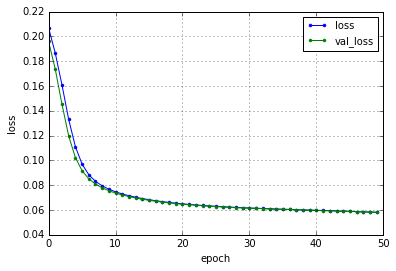

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1978 - val_loss: 0.1810
Epoch 2/50
0s - loss: 0.1607 - val_loss: 0.1362
Epoch 3/50
0s - loss: 0.1197 - val_loss: 0.1035
Epoch 4/50
0s - loss: 0.0950 - val_loss: 0.0872
Epoch 5/50
0s - loss: 0.0832 - val_loss: 0.0795
Epoch 6/50
0s - loss: 0.0775 - val_loss: 0.0754
Epoch 7/50
0s - loss: 0.0741 - val_loss: 0.0728
Epoch 8/50
0s - loss: 0.0719 - val_loss: 0.0709
Epoch 9/50
0s - loss: 0.0703 - val_loss: 0.0695
Epoch 10/50
0s - loss: 0.0690 - val_loss: 0.0684
Epoch 11/50
0s - loss: 0.0680 - val_loss: 0.0674
Epoch 12/50
0s - loss: 0.0671 - val_loss: 0.0666
Epoch 13/50
0s - loss: 0.0663 - val_loss: 0.0659
Epoch 14/50
0s - loss: 0.0656 - val_loss: 0.0652
Epoch 15/50
0s - loss: 0.0650 - val_loss: 0.0647
Epoch 16/50
0s - loss: 0.0645 - val_loss: 0.0642
Epoch 17/50
0s - loss: 0.0640 - val_loss: 0.0637
Epoch 18/50
0s - loss: 0.0635 - val_loss: 0.0633
Epoch 19/50
0s - loss: 0.0631 - val_loss: 0.0629
Epoch 20/50
0s

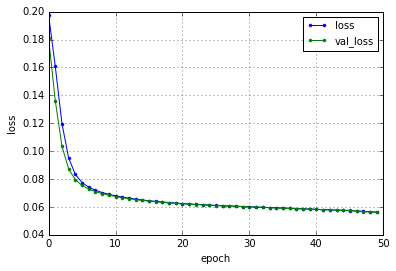

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1940 - val_loss: 0.1741
Epoch 2/50
0s - loss: 0.1542 - val_loss: 0.1307
Epoch 3/50
0s - loss: 0.1149 - val_loss: 0.0991
Epoch 4/50
0s - loss: 0.0910 - val_loss: 0.0835
Epoch 5/50
0s - loss: 0.0798 - val_loss: 0.0763
Epoch 6/50
0s - loss: 0.0745 - val_loss: 0.0726
Epoch 7/50
0s - loss: 0.0715 - val_loss: 0.0703
Epoch 8/50
0s - loss: 0.0696 - val_loss: 0.0687
Epoch 9/50
0s - loss: 0.0681 - val_loss: 0.0675
Epoch 10/50
0s - loss: 0.0670 - val_loss: 0.0665
Epoch 11/50
0s - loss: 0.0661 - val_loss: 0.0656
Epoch 12/50
0s - loss: 0.0653 - val_loss: 0.0649
Epoch 13/50
0s - loss: 0.0646 - val_loss: 0.0642
Epoch 14/50
0s - loss: 0.0640 - val_loss: 0.0636
Epoch 15/50
0s - loss: 0.0634 - val_loss: 0.0631
Epoch 16/50
0s - loss: 0.0629 - val_loss: 0.0626
Epoch 17/50
0s - loss: 0.0625 - val_loss: 0.0622
Epoch 18/50
0s - loss: 0.0620 - val_loss: 0.0619
Epoch 19/50
0s - loss: 0.0617 - val_loss: 0.0614
Epoch 20/50
0s

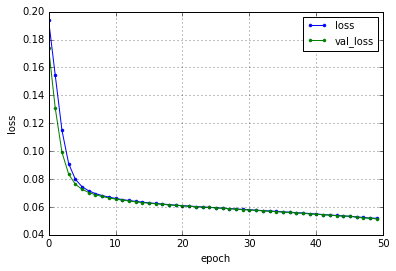

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1933 - val_loss: 0.1600
Epoch 2/50
0s - loss: 0.1322 - val_loss: 0.1040
Epoch 3/50
0s - loss: 0.0908 - val_loss: 0.0797
Epoch 4/50
0s - loss: 0.0756 - val_loss: 0.0721
Epoch 5/50
0s - loss: 0.0706 - val_loss: 0.0692
Epoch 6/50
0s - loss: 0.0684 - val_loss: 0.0674
Epoch 7/50
0s - loss: 0.0668 - val_loss: 0.0661
Epoch 8/50
0s - loss: 0.0656 - val_loss: 0.0650
Epoch 9/50
0s - loss: 0.0646 - val_loss: 0.0640
Epoch 10/50
0s - loss: 0.0637 - val_loss: 0.0632
Epoch 11/50
0s - loss: 0.0628 - val_loss: 0.0624
Epoch 12/50
0s - loss: 0.0621 - val_loss: 0.0616
Epoch 13/50
0s - loss: 0.0613 - val_loss: 0.0609
Epoch 14/50
0s - loss: 0.0606 - val_loss: 0.0602
Epoch 15/50
0s - loss: 0.0599 - val_loss: 0.0596
Epoch 16/50
0s - loss: 0.0593 - val_loss: 0.0589
Epoch 17/50
0s - loss: 0.0586 - val_loss: 0.0582
Epoch 18/50
0s - loss: 0.0580 - val_loss: 0.0576
Epoch 19/50
0s - loss: 0.0574 - val_loss: 0.0570
Epoch 20/50
0s

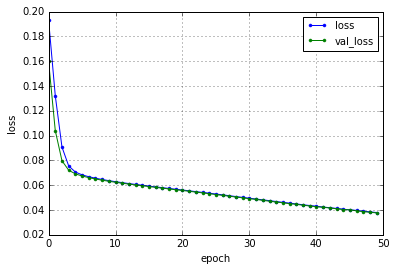

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1887 - val_loss: 0.1359
Epoch 2/50
0s - loss: 0.1074 - val_loss: 0.0835
Epoch 3/50
0s - loss: 0.0761 - val_loss: 0.0706
Epoch 4/50
0s - loss: 0.0689 - val_loss: 0.0672
Epoch 5/50
0s - loss: 0.0664 - val_loss: 0.0654
Epoch 6/50
0s - loss: 0.0647 - val_loss: 0.0638
Epoch 7/50
0s - loss: 0.0633 - val_loss: 0.0625
Epoch 8/50
0s - loss: 0.0619 - val_loss: 0.0611
Epoch 9/50
0s - loss: 0.0606 - val_loss: 0.0599
Epoch 10/50
0s - loss: 0.0594 - val_loss: 0.0587
Epoch 11/50
0s - loss: 0.0582 - val_loss: 0.0575
Epoch 12/50
0s - loss: 0.0570 - val_loss: 0.0563
Epoch 13/50
0s - loss: 0.0559 - val_loss: 0.0552
Epoch 14/50
0s - loss: 0.0547 - val_loss: 0.0540
Epoch 15/50
0s - loss: 0.0536 - val_loss: 0.0529
Epoch 16/50
0s - loss: 0.0524 - val_loss: 0.0518
Epoch 17/50
0s - loss: 0.0513 - val_loss: 0.0507
Epoch 18/50
0s - loss: 0.0502 - val_loss: 0.0495
Epoch 19/50
0s - loss: 0.0490 - val_loss: 0.0484
Epoch 20/50
0s

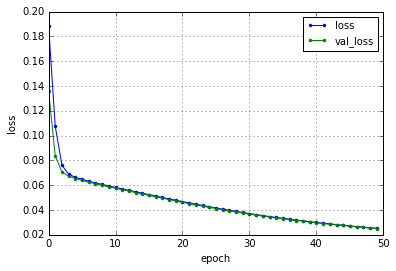

AccZ is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2070 - val_loss: 0.2052
Epoch 2/50
0s - loss: 0.2046 - val_loss: 0.2035
Epoch 3/50
0s - loss: 0.2028 - val_loss: 0.2015
Epoch 4/50
0s - loss: 0.2006 - val_loss: 0.1990
Epoch 5/50
0s - loss: 0.1979 - val_loss: 0.1959
Epoch 6/50
0s - loss: 0.1946 - val_loss: 0.1922
Epoch 7/50
0s - loss: 0.1907 - val_loss: 0.1879
Epoch 8/50
0s - loss: 0.1863 - val_loss: 0.1833
Epoch 9/50
0s - loss: 0.1815 - val_loss: 0.1784
Epoch 10/50
0s - loss: 0.1766 - val_loss: 0.1734
Epoch 11/50
0s - loss: 0.1716 - val_loss: 0.1685
Epoch 12/50
0s - loss: 0.1667 - val_loss: 0.1637
Epoch 13/50
0s - loss: 0.1620 - val_loss: 0.1591
Epoch 14/50
0s - loss: 0.1575 - val_loss: 0.1547
Epoch 15/50
0s - loss: 0.1531 - val_loss: 0.1505
Epoch 16/50
0s - loss: 0.1490 - val_loss: 0.1465
Epoch 17/50
0s - loss: 0.1451 - v

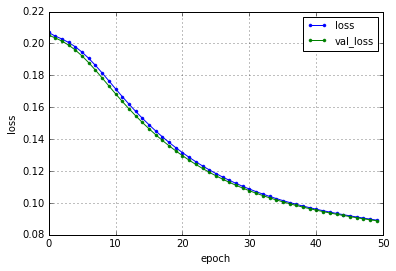

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2075 - val_loss: 0.2045
Epoch 2/50
0s - loss: 0.2032 - val_loss: 0.2011
Epoch 3/50
0s - loss: 0.1998 - val_loss: 0.1974
Epoch 4/50
0s - loss: 0.1959 - val_loss: 0.1930
Epoch 5/50
0s - loss: 0.1912 - val_loss: 0.1878
Epoch 6/50
0s - loss: 0.1858 - val_loss: 0.1821
Epoch 7/50
0s - loss: 0.1799 - val_loss: 0.1760
Epoch 8/50
0s - loss: 0.1737 - val_loss: 0.1696
Epoch 9/50
0s - loss: 0.1672 - val_loss: 0.1630
Epoch 10/50
0s - loss: 0.1607 - val_loss: 0.1565
Epoch 11/50
0s - loss: 0.1542 - val_loss: 0.1501
Epoch 12/50
0s - loss: 0.1478 - val_loss: 0.1439
Epoch 13/50
0s - loss: 0.1418 - val_loss: 0.1381
Epoch 14/50
0s - loss: 0.1361 - val_loss: 0.1327
Epoch 15/50
0s - loss: 0.1309 - val_loss: 0.1277
Epoch 16/50
0s - loss: 0.1260 - val_loss: 0.1231
Epoch 17/50
0s - loss: 0.1216 - val_loss: 0.1190
Epoch 18/50
0s - loss: 0.1176 - val_loss: 0.1152
Epoch 19/50
0s - loss: 0.1139 - val_loss: 0.1117
Epoch 20/50
0s - 

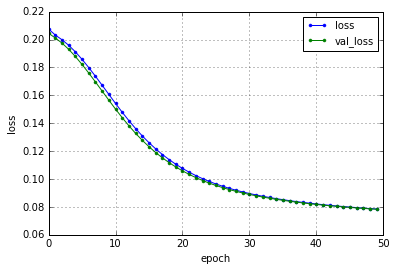

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2089 - val_loss: 0.2042
Epoch 2/50
0s - loss: 0.2023 - val_loss: 0.1991
Epoch 3/50
0s - loss: 0.1971 - val_loss: 0.1932
Epoch 4/50
0s - loss: 0.1906 - val_loss: 0.1858
Epoch 5/50
0s - loss: 0.1828 - val_loss: 0.1774
Epoch 6/50
0s - loss: 0.1741 - val_loss: 0.1682
Epoch 7/50
0s - loss: 0.1649 - val_loss: 0.1589
Epoch 8/50
0s - loss: 0.1556 - val_loss: 0.1499
Epoch 9/50
0s - loss: 0.1467 - val_loss: 0.1413
Epoch 10/50
0s - loss: 0.1383 - val_loss: 0.1334
Epoch 11/50
0s - loss: 0.1307 - val_loss: 0.1262
Epoch 12/50
0s - loss: 0.1239 - val_loss: 0.1199
Epoch 13/50
0s - loss: 0.1178 - val_loss: 0.1144
Epoch 14/50
0s - loss: 0.1125 - val_loss: 0.1095
Epoch 15/50
0s - loss: 0.1079 - val_loss: 0.1053
Epoch 16/50
0s - loss: 0.1039 - val_loss: 0.1017
Epoch 17/50
0s - loss: 0.1005 - val_loss: 0.0985
Epoch 18/50
0s - loss: 0.0975 - val_loss: 0.0958
Epoch 19/50
0s - loss: 0.0949 - val_loss: 0.0934
Epoch 20/50
0s -

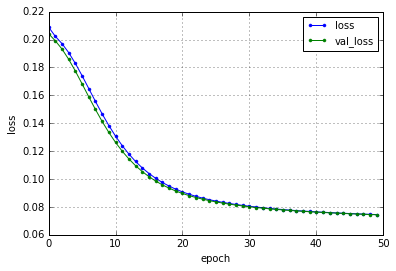

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2107 - val_loss: 0.2063
Epoch 2/50
0s - loss: 0.2046 - val_loss: 0.2016
Epoch 3/50
0s - loss: 0.1997 - val_loss: 0.1959
Epoch 4/50
0s - loss: 0.1932 - val_loss: 0.1881
Epoch 5/50
0s - loss: 0.1848 - val_loss: 0.1786
Epoch 6/50
0s - loss: 0.1748 - val_loss: 0.1679
Epoch 7/50
0s - loss: 0.1639 - val_loss: 0.1569
Epoch 8/50
0s - loss: 0.1530 - val_loss: 0.1462
Epoch 9/50
0s - loss: 0.1425 - val_loss: 0.1362
Epoch 10/50
0s - loss: 0.1329 - val_loss: 0.1273
Epoch 11/50
0s - loss: 0.1244 - val_loss: 0.1195
Epoch 12/50
0s - loss: 0.1170 - val_loss: 0.1127
Epoch 13/50
0s - loss: 0.1106 - val_loss: 0.1070
Epoch 14/50
0s - loss: 0.1052 - val_loss: 0.1022
Epoch 15/50
0s - loss: 0.1007 - val_loss: 0.0982
Epoch 16/50
0s - loss: 0.0969 - val_loss: 0.0948
Epoch 17/50
0s - loss: 0.0937 - val_loss: 0.0919
Epoch 18/50
0s - loss: 0.0910 - val_loss: 0.0895
Epoch 19/50
0s - loss: 0.0888 - val_loss: 0.0876
Epoch 20/50
0s -

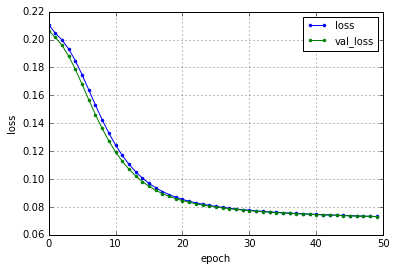

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2121 - val_loss: 0.2042
Epoch 2/50
0s - loss: 0.2012 - val_loss: 0.1957
Epoch 3/50
0s - loss: 0.1921 - val_loss: 0.1850
Epoch 4/50
0s - loss: 0.1805 - val_loss: 0.1720
Epoch 5/50
0s - loss: 0.1668 - val_loss: 0.1576
Epoch 6/50
0s - loss: 0.1524 - val_loss: 0.1432
Epoch 7/50
0s - loss: 0.1383 - val_loss: 0.1299
Epoch 8/50
0s - loss: 0.1256 - val_loss: 0.1182
Epoch 9/50
0s - loss: 0.1146 - val_loss: 0.1085
Epoch 10/50
0s - loss: 0.1055 - val_loss: 0.1006
Epoch 11/50
0s - loss: 0.0982 - val_loss: 0.0944
Epoch 12/50
0s - loss: 0.0926 - val_loss: 0.0896
Epoch 13/50
0s - loss: 0.0883 - val_loss: 0.0860
Epoch 14/50
0s - loss: 0.0850 - val_loss: 0.0833
Epoch 15/50
0s - loss: 0.0825 - val_loss: 0.0813
Epoch 16/50
0s - loss: 0.0807 - val_loss: 0.0797
Epoch 17/50
0s - loss: 0.0793 - val_loss: 0.0785
Epoch 18/50
0s - loss: 0.0782 - val_loss: 0.0776
Epoch 19/50
0s - loss: 0.0773 - val_loss: 0.0769
Epoch 20/50
0s -

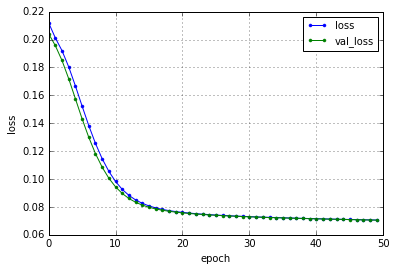

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2202 - val_loss: 0.2023
Epoch 2/50
0s - loss: 0.1954 - val_loss: 0.1835
Epoch 3/50
0s - loss: 0.1766 - val_loss: 0.1639
Epoch 4/50
0s - loss: 0.1564 - val_loss: 0.1431
Epoch 5/50
0s - loss: 0.1360 - val_loss: 0.1241
Epoch 6/50
0s - loss: 0.1182 - val_loss: 0.1085
Epoch 7/50
0s - loss: 0.1040 - val_loss: 0.0969
Epoch 8/50
0s - loss: 0.0938 - val_loss: 0.0889
Epoch 9/50
0s - loss: 0.0867 - val_loss: 0.0834
Epoch 10/50
0s - loss: 0.0821 - val_loss: 0.0799
Epoch 11/50
0s - loss: 0.0790 - val_loss: 0.0776
Epoch 12/50
0s - loss: 0.0770 - val_loss: 0.0761
Epoch 13/50
0s - loss: 0.0757 - val_loss: 0.0751
Epoch 14/50
0s - loss: 0.0748 - val_loss: 0.0744
Epoch 15/50
0s - loss: 0.0742 - val_loss: 0.0738
Epoch 16/50
0s - loss: 0.0737 - val_loss: 0.0734
Epoch 17/50
0s - loss: 0.0733 - val_loss: 0.0731
Epoch 18/50
0s - loss: 0.0730 - val_loss: 0.0728
Epoch 19/50
0s - loss: 0.0727 - val_loss: 0.0726
Epoch 20/50
0s -

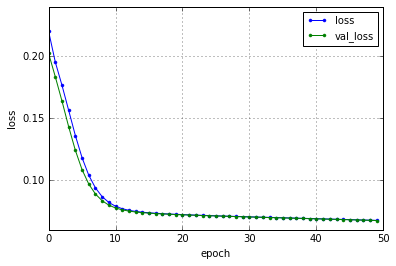

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2 ,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()